In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

In [3]:
df_original = pd.read_csv("car_acceptability.txt", sep = ",", header = None)
df_original.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,?,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,?,unacc


In [4]:
df = df_original.copy()

In [5]:
df.columns = ["price", "maint", "doors", "capacity", "lugg_capacity", "safety", "situation"]

In [6]:
df.head()

,price,maint,doors,capacity,lugg_capacity,safety,situation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,?,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,?,unacc


In [7]:
df.info() # datamız genel olarak temiz gözüküyor lakin bütün sütunlar object değerinde sayısal sütunların içinde str değerleri olabilir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          1728 non-null   object
 1   maint          1729 non-null   object
 2   doors          1729 non-null   object
 3   capacity       1729 non-null   object
 4   lugg_capacity  1729 non-null   object
 5   safety         1728 non-null   object
 6   situation      1729 non-null   object
dtypes: object(7)
memory usage: 94.7+ KB


In [8]:
for col in df.columns:
    print("****************************")
    print(f"{col} sütunu")
    print("****************************")
    print(df[col].value_counts())
    

****************************
price sütunu
****************************
high     432
med      431
vhigh    430
low      430
?          3
-          1
düsük      1
Name: price, dtype: int64
****************************
maint sütunu
****************************
high     432
med      432
low      432
vhigh    429
?          4
Name: maint, dtype: int64
****************************
doors sütunu
****************************
3        432
2        430
4        430
5more    430
?          3
-          1
44         1
iki        1
5+         1
Name: doors, dtype: int64
****************************
capacity sütunu
****************************
4       576
more    576
2       574
?         3
Name: capacity, dtype: int64
****************************
lugg_capacity sütunu
****************************
small    576
big      576
med      575
?          2
Name: lugg_capacity, dtype: int64
****************************
safety sütunu
****************************
high    576
med     574
low     573
?         2


In [9]:
# Target sütunu dışında verimiz dengeli dağılmış gözüküyor, ayrıyeten verimizde bir kaç tane geçersiz 
# değerler var bu değerleri uygun bir şekilde ele alacağız.

In [10]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

In [11]:
df.replace({"?": np.nan, "*": np.nan, "-": np.nan, "düsük": "low", "5more": "5", "5+": "5", "iki": "2", "44":"4", "more": "5"}, inplace = True)

In [12]:
for col in df.columns:
    print("****************************")
    print(f"{col} sütunu")
    print("****************************")
    print(df[col].value_counts())
    

****************************
price sütunu
****************************
high     432
med      431
low      431
vhigh    430
Name: price, dtype: int64
****************************
maint sütunu
****************************
high     432
med      432
low      432
vhigh    429
Name: maint, dtype: int64
****************************
doors sütunu
****************************
3    432
2    431
4    431
5    431
Name: doors, dtype: int64
****************************
capacity sütunu
****************************
4    576
5    576
2    574
Name: capacity, dtype: int64
****************************
lugg_capacity sütunu
****************************
small    576
big      576
med      575
Name: lugg_capacity, dtype: int64
****************************
safety sütunu
****************************
high    576
med     574
low     573
Name: safety, dtype: int64
****************************
situation sütunu
****************************
unacc    1209
acc       384
good       69
vgood      65
Name: situation, dtyp

In [13]:
df.head()

,price,maint,doors,capacity,lugg_capacity,safety,situation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,NaN,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,NaN,unacc


In [14]:
imputer = SimpleImputer(strategy = "most_frequent")

In [15]:
df = imputer.fit_transform(df)

In [16]:
df = pd.DataFrame(df , columns = ["price", "maint", "doors", "capacity", "lugg_capacity", "safety", "situation"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          1729 non-null   object
 1   maint          1729 non-null   object
 2   doors          1729 non-null   object
 3   capacity       1729 non-null   object
 4   lugg_capacity  1729 non-null   object
 5   safety         1729 non-null   object
 6   situation      1729 non-null   object
dtypes: object(7)
memory usage: 94.7+ KB


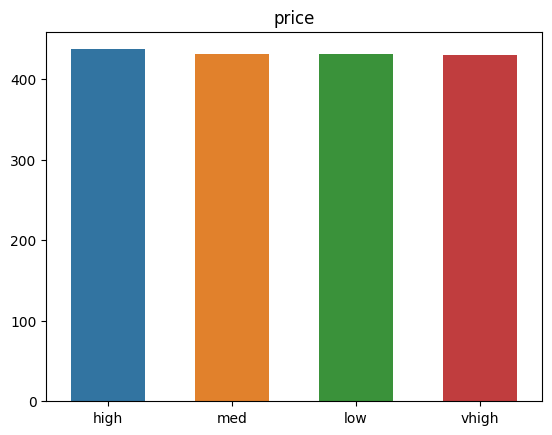

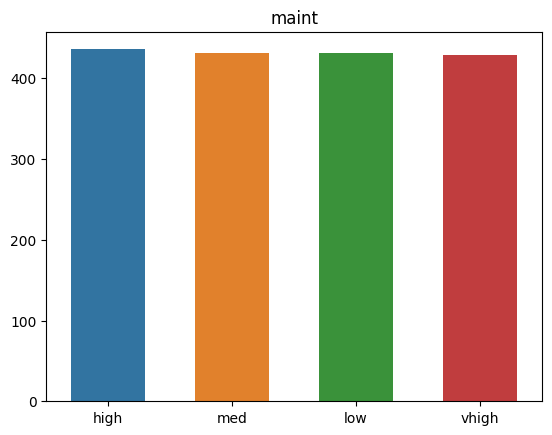

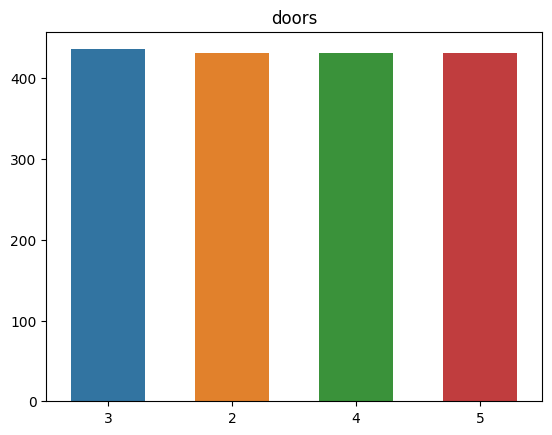

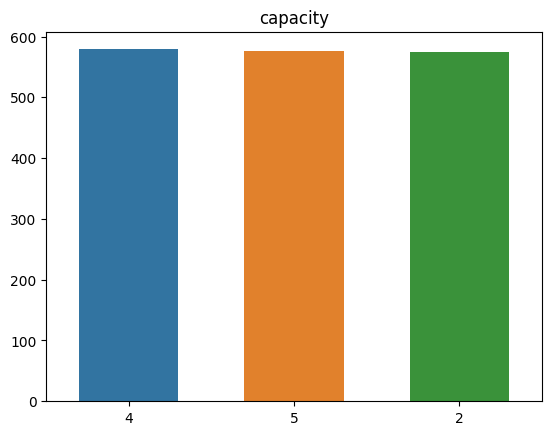

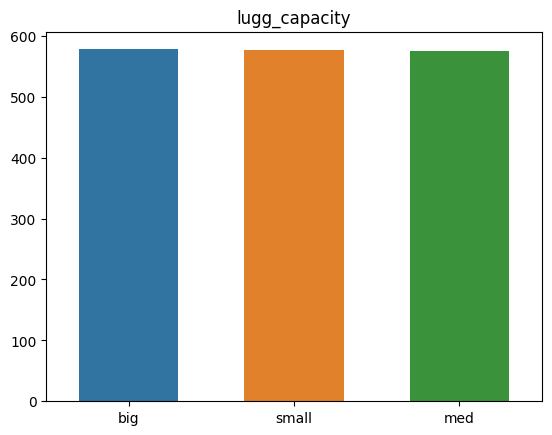

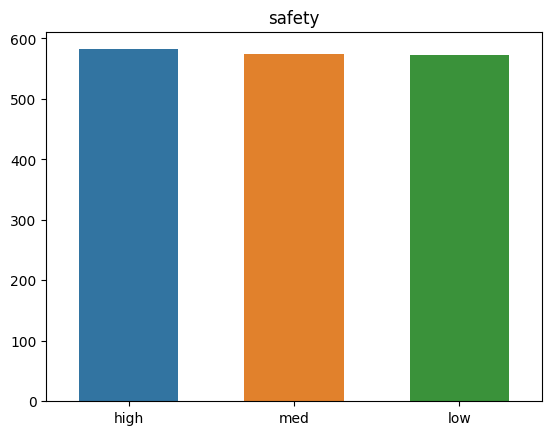

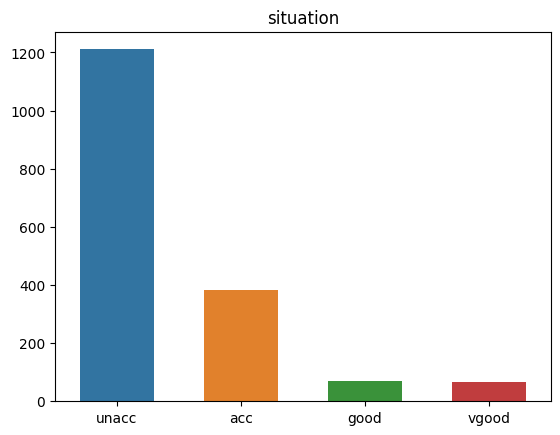

In [18]:
for col in df.columns:
    sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts().values, width = 0.6)
    plt.title(col)
    plt.show()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
y = df["situation"]
X = df.drop("situation", axis= 1)

In [21]:
X

,price,maint,doors,capacity,lugg_capacity,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,4,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1724,low,low,5,5,med,high
1725,low,low,5,5,big,low
1726,low,low,5,5,big,med
1727,low,low,5,5,big,high


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 

In [23]:
X_train

,price,maint,doors,capacity,lugg_capacity,safety
107,vhigh,vhigh,5,5,big,high
901,med,vhigh,3,4,small,med
1710,low,low,5,4,small,low
706,high,med,4,2,med,med
678,high,med,3,2,med,low
...,...,...,...,...,...,...
1130,med,med,3,5,med,high
1294,med,low,5,5,big,med
860,high,low,5,5,med,high
1459,low,high,4,2,small,med


In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 107 to 1126
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          1383 non-null   object
 1   maint          1383 non-null   object
 2   doors          1383 non-null   object
 3   capacity       1383 non-null   object
 4   lugg_capacity  1383 non-null   object
 5   safety         1383 non-null   object
dtypes: object(6)
memory usage: 75.6+ KB


In [25]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 599 to 1084
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          346 non-null    object
 1   maint          346 non-null    object
 2   doors          346 non-null    object
 3   capacity       346 non-null    object
 4   lugg_capacity  346 non-null    object
 5   safety         346 non-null    object
dtypes: object(6)
memory usage: 18.9+ KB


In [26]:
y_test

599     unacc
1201      acc
628     unacc
1711      acc
1263    unacc
        ...  
100     unacc
274     unacc
1206    unacc
101     unacc
1084    unacc
Name: situation, Length: 346, dtype: object

In [27]:
X_train[["doors", "capacity"]] = X_train[["doors", "capacity"]].astype(int)
X_test[["doors", "capacity"]] = X_test[["doors", "capacity"]].astype(int)

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 107 to 1126
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          1383 non-null   object
 1   maint          1383 non-null   object
 2   doors          1383 non-null   int32 
 3   capacity       1383 non-null   int32 
 4   lugg_capacity  1383 non-null   object
 5   safety         1383 non-null   object
dtypes: int32(2), object(4)
memory usage: 64.8+ KB


In [29]:
X_train.replace({"low":1,"med":2, "high":3,"vhigh":4, "small":1,"big":3},inplace = True)
X_test.replace({"low":1,"med":2, "high":3,"vhigh":4, "small":1,"big":3},inplace = True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 107 to 1126
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   price          1383 non-null   int64
 1   maint          1383 non-null   int64
 2   doors          1383 non-null   int32
 3   capacity       1383 non-null   int32
 4   lugg_capacity  1383 non-null   int64
 5   safety         1383 non-null   int64
dtypes: int32(2), int64(4)
memory usage: 64.8 KB


In [30]:
y_test.value_counts()

unacc    241
acc       80
vgood     13
good      12
Name: situation, dtype: int64

In [31]:
y_train.replace({"unacc":0,"acc":1, "good":2,"vgood":3},inplace = True)
y_test.replace({"unacc":0,"acc":1, "good":2,"vgood":3},inplace = True)

In [32]:
# Veriyi temizlediğime göre artık veriyi analiz edebilirim.

In [33]:
y_train.isna().sum()

0

In [34]:
X_train

,price,maint,doors,capacity,lugg_capacity,safety
107,4,4,5,5,3,3
901,2,4,3,4,1,2
1710,1,1,5,4,1,1
706,3,2,4,2,2,2
678,3,2,3,2,2,1
...,...,...,...,...,...,...
1130,2,2,3,5,2,3
1294,2,1,5,5,3,2
860,3,1,5,5,2,3
1459,1,3,4,2,1,2


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
vanilla_lr = LogisticRegression()
vanilla_lr.fit(X_train, y_train)

C:\Users\4242o\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
vanilla_preds = vanilla_lr.predict(X_test)
vanilla_preds

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 1, 3, 3, 2, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 1,
       2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 3, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 3, 0, 1, 0, 1, 3, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 3, 1, 1, 0, 0, 0,

In [38]:
np.array(y_test)

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 2, 3, 2, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 3, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 1, 3, 0, 0,
       1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0,

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_train, vanilla_lr.predict(X_train), digits = 2))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       970
           1       0.70      0.64      0.67       304
           2       0.67      0.51      0.58        57
           3       0.83      0.77      0.80        52

    accuracy                           0.85      1383
   macro avg       0.78      0.72      0.74      1383
weighted avg       0.85      0.85      0.85      1383



In [41]:
print(classification_report(y_test, vanilla_preds, digits = 2))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       241
           1       0.72      0.64      0.68        80
           2       0.40      0.33      0.36        12
           3       0.64      0.69      0.67        13

    accuracy                           0.84       346
   macro avg       0.67      0.65      0.66       346
weighted avg       0.83      0.84      0.83       346



In [42]:
confusion_matrix(y_test, vanilla_preds)

array([[226,  12,   3,   0],
       [ 25,  51,   2,   2],
       [  0,   5,   4,   3],
       [  0,   3,   1,   9]], dtype=int64)

In [43]:
param_dist = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["saga", "liblinear"]
}


In [44]:
from sklearn.model_selection import  RandomizedSearchCV

In [45]:
tune_model = LogisticRegression()

In [46]:
random_search = RandomizedSearchCV(
    tune_model, param_distributions = param_dist, cv = 5, n_iter = 100,
    verbose = 1
)

In [47]:
random_search.fit(X_train, y_train)

C:\Users\4242o\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\4242o\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\4242o\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\4242o\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\4242o\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\4242o\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\4242o\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\4242o\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\4242o\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\4242o\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\4242o\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['saga', 'liblinear']},
                   verbose=1)

In [48]:
random_search.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 10}

In [49]:
best_model = random_search.best_estimator_

In [50]:
tuned_preds = best_model.predict(X_test)

In [51]:
print(classification_report(y_test, tuned_preds, digits = 2))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       241
           1       0.72      0.65      0.68        80
           2       0.33      0.33      0.33        12
           3       0.50      0.46      0.48        13

    accuracy                           0.83       346
   macro avg       0.61      0.59      0.60       346
weighted avg       0.82      0.83      0.82       346



In [52]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',
                                  splitter = 'best',
                                  max_depth =7,
                                  min_samples_split = 2,
                                  max_features = 5,
                                  random_state = 42
                                  )

In [78]:
dt_model.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=5,
                       random_state=42)

In [79]:
dt_model_y_train_pred = dt_model.predict(X_train)

In [80]:
print(classification_report(y_train , dt_model_y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       970
           1       0.84      0.90      0.87       304
           2       0.86      0.67      0.75        57
           3       0.89      0.79      0.84        52

    accuracy                           0.94      1383
   macro avg       0.89      0.83      0.86      1383
weighted avg       0.94      0.94      0.94      1383



In [81]:
dt_model_y_pred = dt_model.predict(X_test)

In [82]:
print(classification_report(y_test , dt_model_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       241
           1       0.91      0.76      0.83        80
           2       0.50      0.50      0.50        12
           3       0.61      0.85      0.71        13

    accuracy                           0.91       346
   macro avg       0.74      0.77      0.75       346
weighted avg       0.92      0.91      0.91       346



In [83]:
confusion_matrix(y_test, dt_model_y_pred)

array([[238,   3,   0,   0],
       [ 11,  61,   6,   2],
       [  0,   1,   6,   5],
       [  0,   2,   0,  11]], dtype=int64)

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf_model = RandomForestClassifier(n_estimators= 200,
                                  criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 5,
                                  max_features = 3,
                                  bootstrap = True,
                                  max_samples = 0.6
                                  )

In [98]:
rf_model.fit(X_train , y_train)

RandomForestClassifier(max_depth=5, max_features=3, max_samples=0.6,
                       min_samples_split=5, n_estimators=200)

In [112]:
rf_model_y_train_pred = rf_model.predict(X_train)
print(classification_report(y_train , rf_model_y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       970
           1       0.59      0.91      0.72       304
           2       0.00      0.00      0.00        57
           3       0.00      0.00      0.00        52

    accuracy                           0.84      1383
   macro avg       0.39      0.46      0.41      1383
weighted avg       0.81      0.84      0.82      1383



C:\Users\4242o\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\4242o\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\4242o\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [100]:
rf_model_y_pred = rf_model.predict(X_test)
print(classification_report(y_test , rf_model_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       241
           1       0.82      0.93      0.87        80
           2       1.00      0.17      0.29        12
           3       0.62      0.62      0.62        13

    accuracy                           0.92       346
   macro avg       0.85      0.67      0.69       346
weighted avg       0.93      0.92      0.91       346

